In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, k_means
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('/Users/sammarcustaylor/Desktop/StudentsPerformance.csv')

df.rename(columns = {'race/ethnicity' : 'race_ethnicity', 'parental level of education' : 'parent_education', 
                     'test preperation course' : 'test_prep', 'math score': 'math_score', 
                     'reading score' : 'reading_score', 'writing score' : 'writing_score'}, inplace = True)

In [3]:
for column in df:
    unique_vals = np.unique(df[column])
    num_values = len(unique_vals)
    if num_values < 10:
         print("The number of values for feature {} : {} --> {}".format(column, num_values, unique_vals))
    else:
        print("The number of values for feature {} : {}".format(column, num_values, unique_vals))

The number of values for feature gender : 2 --> ['female' 'male']
The number of values for feature race_ethnicity : 5 --> ['group A' 'group B' 'group C' 'group D' 'group E']
The number of values for feature parent_education : 6 --> ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
The number of values for feature lunch : 2 --> ['free/reduced' 'standard']
The number of values for feature test preparation course : 2 --> ['completed' 'none']
The number of values for feature math_score : 81
The number of values for feature reading_score : 72
The number of values for feature writing_score : 77


In [4]:
df

,gender,race_ethnicity,parent_education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# replace scores with letter labels. 

df['math_'] = pd.cut(df.math_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])
df['reading_'] = pd.cut(df.reading_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])
df['writing_'] = pd.cut(df.writing_score, bins = [0, 59, 69, 79, 89, 99], labels = ['F','D', 'C', 'B', 'A'])

df.drop(['math_score', 'reading_score', 'writing_score'], axis = 1, inplace = True)

In [6]:
# make categorical variables into numeric representations 
# 8 columns to 32 columns. 

new_df = pd.get_dummies(df)

print(df.shape)
print(new_df.shape)

(1000, 8)
(1000, 32)


In [10]:
X_train = new_df.values

# start with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print('The clusters are :', kmeans.labels_)


# Prints the inertia
print('The intertia is: ', kmeans.inertia_)


# for each record we have each is classified into a cluster. Every student corresponds to one cluster. 

# Intertia is a metric that shows how internally coherent the clusters are. 

The clusters are : [0 0 0 1 2 0 0 1 2 1 1 1 0 2 1 0 2 1 1 1 2 0 1 0 2 2 1 0 2 0 0 0 0 1 2 2 0
 1 0 1 1 0 0 2 1 1 0 0 0 2 1 2 1 2 0 1 0 1 1 1 2 1 1 0 1 2 1 0 1 1 0 2 1 1
 1 1 1 2 0 0 1 1 1 2 1 0 0 0 0 0 0 1 2 1 0 2 2 0 0 0 2 2 0 1 2 0 0 2 0 0 0
 1 1 1 0 2 0 0 0 0 0 2 0 1 2 0 2 2 2 1 2 1 2 0 2 1 1 1 0 2 0 0 1 1 2 1 2 2
 0 2 2 2 0 1 2 0 0 2 0 2 2 0 1 1 0 0 1 0 0 0 2 2 0 0 1 0 1 0 0 0 2 0 1 0 1
 2 2 2 1 0 0 2 0 2 0 1 2 1 1 0 0 0 2 0 1 2 2 2 0 0 2 1 0 1 2 2 0 1 2 1 0 2
 0 2 0 1 0 1 2 0 2 1 0 2 2 2 2 0 1 2 2 0 1 1 2 2 2 0 0 2 1 0 0 2 1 0 0 2 0
 0 0 2 1 0 2 1 0 0 0 0 2 1 1 0 2 2 0 0 0 1 1 1 0 0 1 2 2 0 2 2 2 2 2 0 2 2
 1 2 1 2 2 1 0 2 0 2 2 1 0 1 0 2 2 0 0 2 0 2 2 0 0 0 0 1 1 0 2 1 2 1 2 1 1
 2 0 0 2 1 1 0 1 0 0 2 2 0 2 0 2 2 0 1 0 1 0 0 2 0 2 0 1 2 1 1 1 1 1 2 1 0
 2 0 2 0 0 1 0 0 0 2 0 2 2 1 1 0 0 0 0 2 2 0 2 1 0 1 0 0 2 1 0 1 1 0 1 0 2
 0 1 2 0 2 2 2 0 2 2 2 2 1 0 0 0 0 1 0 2 2 1 1 1 0 1 1 2 1 2 2 1 2 0 0 0 0
 2 0 2 2 1 2 0 0 0 1 0 1 0 1 0 2 1 1 0 0 2 0 1 2 0 2 0 0 0 0 0 0 2 2 0 2 2
 1 2 1

In [12]:
# Intertia goes down with more clusters. This is because the more individual clusters the less spread out individual
# points will be from any given cluster. 



no_of_clusters = range(2, 11)
intertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters = f, random_state = 2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    intertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 4657.217146505691
The inertia for : 3 Clusters is: 4268.497470387483
The inertia for : 4 Clusters is: 4040.5076394513267
The inertia for : 5 Clusters is: 3852.745652080276
The inertia for : 6 Clusters is: 3683.396660384237
The inertia for : 7 Clusters is: 3570.4916397323
The inertia for : 8 Clusters is: 3450.460936730512
The inertia for : 9 Clusters is: 3399.239506779841
The inertia for : 10 Clusters is: 3306.0255581258657


Text(0.5, 1.0, 'Intertia Plot per K')

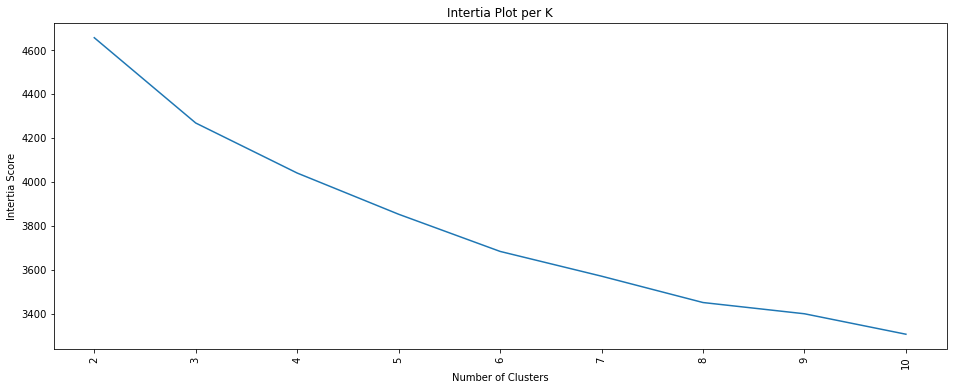

In [13]:
# elbow method

fig, (ax1) = plt.subplots(1, figsize = (16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, intertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia Score')
plt.title('Intertia Plot per K')


In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# predictions for new data
predictions = kmeans.predict(X_train)

# calculating the counts of each cluster class
unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1, 3)

# creating a dataframe
count_cl_df = pd.DataFrame(counts, columns = ['Cluster 1', 'Cluster 2', 'Cluster 3'])

count_cl_df

,Cluster 1,Cluster 2,Cluster 3
0,421,267,312


Explained variance ration (first two components): [0.12230049 0.07857447]


<Figure size 432x288 with 0 Axes>

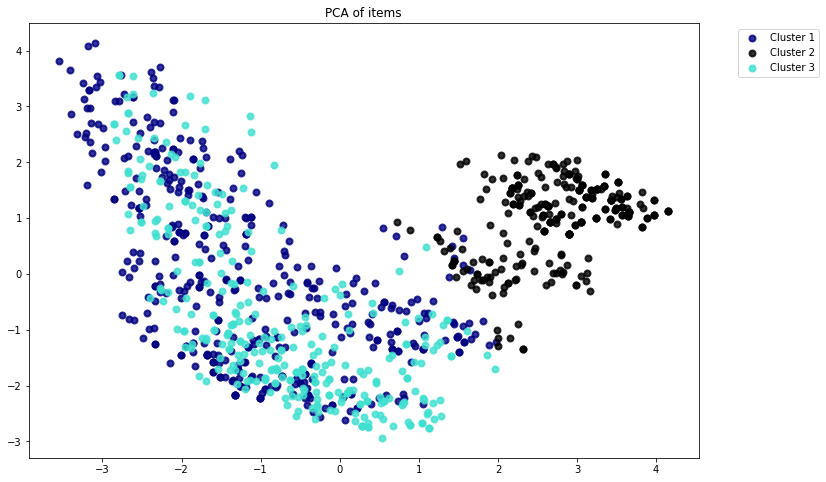

In [22]:
X = X_train
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

X_scaled = preprocessing.scale(X)

pca = PCA(n_components=2, random_state = 45)
X_r = pca.fit(X_scaled).transform(X_scaled)


print('Explained variance ration (first two components): %s' % str(pca.explained_variance_ratio_))

# plotting the data
plt.figure()
plt.figure(figsize = (12, 8))
colors = ['navy', 'black', 'turquoise']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, alpha = .8, lw = lw, label = target_name)
    
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad =0.6)
plt.title('PCA of items')
plt.show()

# This is two principal components explaining 19 percent of the variance in our dataset. 

In [ ]:
# next step improving score, and modifying PCA. 